# P1. Exploration

## 1. Description Générale

En utilisant DBeaver et les paramètres de connexion donnés par ailleurs, faire une description détaillée de la base de données fournie. Présenter notamment le diagramme entité - relation (ERD) et les différentes caractéristiques des tables de la base.  Quelles types de renseignement peut-on tirer de cette base de données ?   

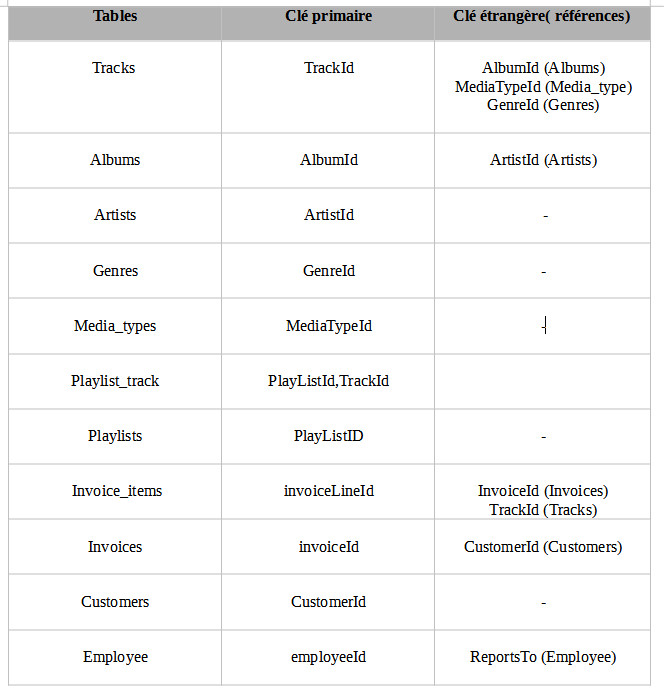

In [7]:
from IPython.display import Image
Image("img\db.png")

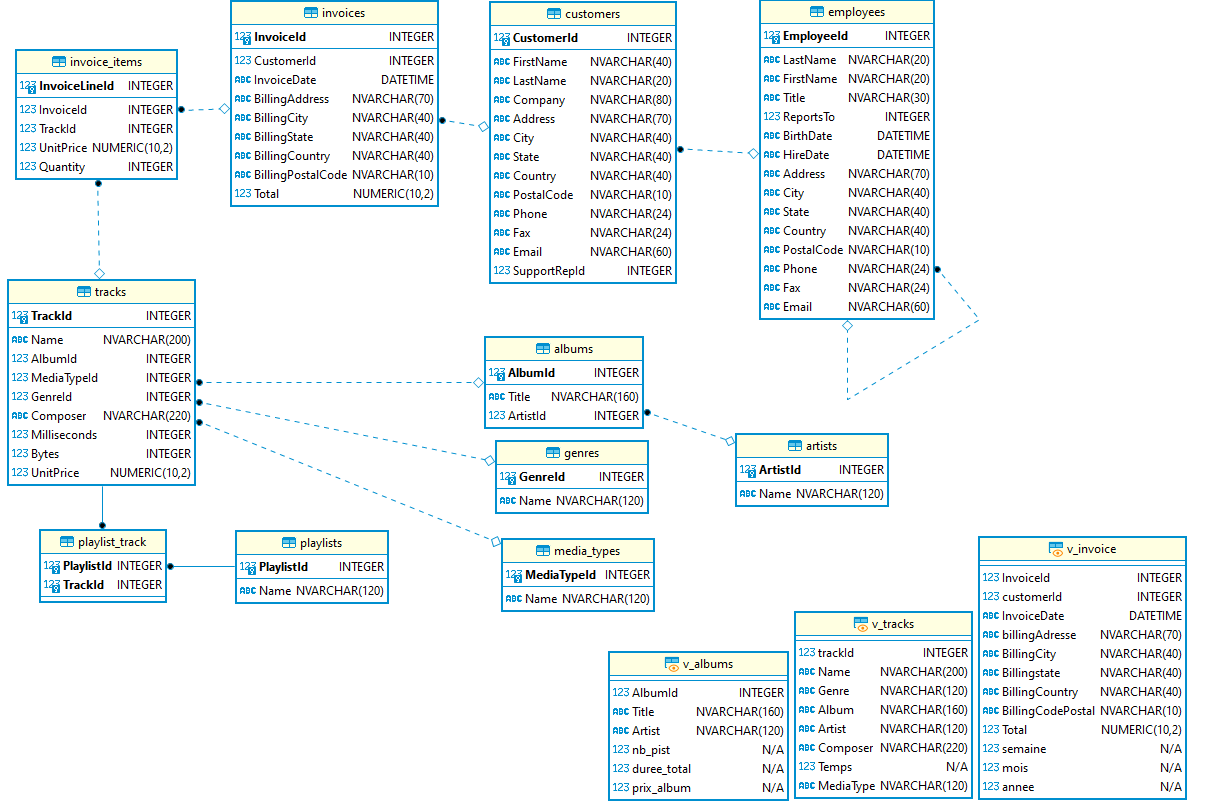

In [6]:
Image("img\ER.png")

---

## 2. Exploration SQL via python / pandas
Dans cette partie, on s'attache à explorer la base de données en utilisant le language SQL pour les requêtes et le language Python (+ module pandas) pour récupérer les résultats de façon programmatique.  
Vous pouvez utiliser DBeaver ou outil similaire pour préparer / tester vos requêtes mais celles-ci doivent être reportées et appliquées dans du code Python comme présenté dans les quelques examples à suivre.  
*Pour les résultats "longs", un aperçu des quelques premières lignes et le comptage total des résultats est suffisant.*

In [3]:
import os
import sqlite3
import pandas as pd 


In [3]:
from pathlib import Path

In [4]:
# Ouvre connection vers SQLite db
chemin_bdd = Path('db') / 'chinook.db'
conn = sqlite3.connect(chemin_bdd)

In [ ]:
query = """
"""
results = pd.read_sql_query(query, conn)
results

### Organigramme Compagnie

Q01. Ecrivez et exécutez une unique requête listant chaque employée de la compagnie (Id, nom + prénom, Titre) ainsi que son manager direct (nom + prénom, Titre)

In [14]:
# requête de départ
query = """
    SELECT e.EmployeeId AS 'Id', e.firstname || ' ' || e.lastname AS 'Employee',
e.Title AS "Titre Employé", m.firstname  || ' ' ||  m.lastname AS 'Manager',
m.Title AS "Titre Manager"   
FROM employees e
LEFT JOIN employees m ON e.ReportsTo = m.employeeId 
"""

In [15]:
results = pd.read_sql_query(query, conn)
results

,Id,Employee,Titre Employé,Manager,Titre Manager
0,1,Andrew Adams,General Manager,None,None
1,2,Nancy Edwards,Sales Manager,Andrew Adams,General Manager
2,3,Jane Peacock,Sales Support Agent,Nancy Edwards,Sales Manager
3,4,Margaret Park,Sales Support Agent,Nancy Edwards,Sales Manager
4,5,Steve Johnson,Sales Support Agent,Nancy Edwards,Sales Manager
5,6,Michael Mitchell,IT Manager,Andrew Adams,General Manager
6,7,Robert King,IT Staff,Michael Mitchell,IT Manager
7,8,Laura Callahan,IT Staff,Michael Mitchell,IT Manager


Q02. Pour chaque artiste présent dans cette BDD, indiquez le nombre d'albums de cet artiste également répertorié (Liste triée par nom d'artiste)


In [16]:
query = """
select a.Name,l.Title ,count(l.AlbumId) as nbr_album 
from artists a
left join albums l on a.ArtistId =l.ArtistId
group by a.Name 
ORDER by nbr_album desc """


In [17]:
results = pd.read_sql_query(query, conn)
results

,Name,Title,nbr_album
0,Iron Maiden,A Matter of Life and Death,21
1,Led Zeppelin,BBC Sessions [Disc 1] [Live],14
2,Deep Purple,MK III The Final Concerts [Disc 1],11
3,U2,Achtung Baby,10
4,Metallica,Garage Inc. (Disc 1),10
...,...,...,...
270,Azymuth,None,0
271,Avril Lavigne,None,0
272,Aerosmith & Sierra Leone's Refugee Allstars,None,0
273,"Academy of St. Martin in the Fields, Sir Nevil...",None,0


Q03. Produire une liste des albums reprenant également l'artiste de l'album, le nombre de pistes, la durée de toutes les pistes (en minutes) et le coût total (Liste triée par artiste puis nom d'album)


In [25]:
query = """
select a.Title ,a2.Name,(sum(t.Milliseconds))/60000 as duree_total, count(t.TrackId)as nbr_piste, sum(t.UnitPrice) as prix_total
from albums a 
inner join artists a2 on a.ArtistId =a2.ArtistId 
inner join tracks t on t.AlbumId = a.AlbumId 
GROUP by a.Title ,a2.Name
order by a.Title ,a2.Name,nbr_piste """

In [26]:
results = pd.read_sql_query(query, conn)
results

,Title,Name,duree_total,nbr_piste,prix_total
0,...And Justice For All,Metallica,65,9,8.91
1,20th Century Masters - The Millennium Collecti...,Scorpions,57,12,11.88
2,"A Copland Celebration, Vol. I",Aaron Copland & London Symphony Orchestra,3,1,0.99
3,A Matter of Life and Death,Iron Maiden,79,11,10.89
4,A Real Dead One,Iron Maiden,59,12,11.88
...,...,...,...,...,...
342,Warner 25 Anos,Antônio Carlos Jobim,48,14,13.86
343,Weill: The Seven Deadly Sins,Kent Nagano and Orchestre de l'Opéra de Lyon,6,1,0.99
344,Worlds,Aaron Goldberg,4,1,0.99
345,Zooropa,U2,50,10,9.90


Q04. Produire une liste des toutes les playlists reprenant son nom, le nombre de pistes, la durée de toutes les pistes (en minutes) et le coût total (Liste triée par nom de playlist)


In [15]:
query = """select p.PlaylistId,p.Name ,count(t.TrackId) as nbre_track,COALESCE((sum(t.Milliseconds))/60000,0) as duree,COALESCE(sum(t.UnitPrice),0) as prix_total
from playlists p
left join playlist_track pt on p.PlaylistId =pt.PlaylistId 
left join tracks t on pt.TrackId = t.TrackId 
Group by p.PlaylistId 
ORDER by p.Name DESC   """

In [16]:
results = pd.read_sql_query(query, conn)
results

,PlaylistId,Name,nbre_track,duree,prix_total
0,3,TV Shows,213,8351,423.87
1,10,TV Shows,213,8351,423.87
2,18,On-The-Go 1,1,3,0.99
3,9,Music Videos,1,4,0.99
4,1,Music,3290,14628,3257.10
5,8,Music,3290,14628,3257.10
6,2,Movies,0,0,0.00
7,7,Movies,0,0,0.00
8,17,Heavy Metal Classic,26,136,25.74
9,16,Grunge,15,68,14.85


Q05. Produire une liste des tous les genres de musique reprenant son genre, le nombre de pistes, la durée de toutes les pistes (en minutes), le coût total et le coût moyen (Liste triée par nom de genre)


In [19]:
query = """
select g.Name  ,count(t.TrackId) as nbre_piste,COALESCE(sum(t.Milliseconds)/60000,0) as duree,COALESCE(sum(t.UnitPrice),0) as prix_total,COALESCE(AVG(t.UnitPrice),0) as prix_moyen
from genres g 
left join tracks t on  g.GenreId =t.GenreId   
Group by  g.Name 
ORDER by nbre_piste DESC 

"""
results = pd.read_sql_query(query, conn)
results

,Name,nbre_piste,duree,prix_total,prix_moyen
0,Rock,1297,6137,1284.03,0.99
1,Latin,579,2247,573.21,0.99
2,Metal,374,1930,370.26,0.99
3,Alternative & Punk,332,1296,328.68,0.99
4,Jazz,130,632,128.70,0.99
5,TV Shows,93,3324,185.07,1.99
6,Blues,81,364,80.19,0.99
7,Classical,74,362,73.26,0.99
8,Drama,64,2746,127.36,1.99
9,R&B/Soul,61,223,60.39,0.99


Q06. Indiquez les caractéristiques principales de toutes les pistes correspondant au genre 'Science Fiction' (nom de piste, album, artiste de l'album, compositeur, nom du type de media, durée (en secondes) et prix unitaire


In [9]:
query = """
select t.Name,a.Title,t.Composer,mt.Name ,t.Milliseconds/1000 as duree,t.UnitPrice 
from genres g 
join tracks t on  g.GenreId =t.GenreId
left join albums a on t.AlbumId =a.AlbumId
join media_types mt on t.MediaTypeId =mt.MediaTypeId 
where g.Name ="Science Fiction"
"""
results = pd.read_sql_query(query, conn)
results

,Name,Title,Composer,Name,duree,UnitPrice
0,Battlestar Galactica: The Story So Far,Battlestar Galactica: The Story So Far,None,Protected MPEG-4 video file,2622,1.99
1,A Measure of Salvation,"Battlestar Galactica, Season 3",None,Protected MPEG-4 video file,2563,1.99
2,Hero,"Battlestar Galactica, Season 3",None,Protected MPEG-4 video file,2713,1.99
3,Unfinished Business,"Battlestar Galactica, Season 3",None,Protected MPEG-4 video file,2622,1.99
4,The Passage,"Battlestar Galactica, Season 3",None,Protected MPEG-4 video file,2623,1.99
5,The Eye of Jupiter,"Battlestar Galactica, Season 3",None,Protected MPEG-4 video file,2618,1.99
6,Rapture,"Battlestar Galactica, Season 3",None,Protected MPEG-4 video file,2624,1.99
7,Taking a Break from All Your Worries,"Battlestar Galactica, Season 3",None,Protected MPEG-4 video file,2624,1.99
8,The Woman King,"Battlestar Galactica, Season 3",None,Protected MPEG-4 video file,2626,1.99
9,A Day In the Life,"Battlestar Galactica, Season 3",None,Protected MPEG-4 video file,2620,1.99


Q07. Retrouvez tous les clients (nom, prénom, email, pays) ayant acheté de la musique de type 'World'


In [10]:
query = """
select t.TrackId ,t.Name as tracks , c.FirstName  || ' ' || c.LastName as nom_prenom, c.Email ,c.Country 
from tracks t 
join genres g on t.GenreId = g.GenreId and g.Name ="World"
join invoice_items i on t.TrackId =i.TrackId 
join invoices i2 on i.InvoiceId =i2.InvoiceId 
join customers c on i2.CustomerId =c.CustomerId 
"""
results = pd.read_sql_query(query, conn)
results

,TrackId,tracks,nom_prenom,Email,Country
0,1535,No Futuro,João Fernandes,jfernandes@yahoo.pt,Portugal
1,1536,Voce Inteira,Jennifer Peterson,jenniferp@rogers.ca,Canada
2,1539,Equinocio,Mark Philips,mphilips12@shaw.ca,Canada
3,1540,Papelão,Steve Murray,steve.murray@yahoo.uk,United Kingdom
4,1544,Cafezinho,João Fernandes,jfernandes@yahoo.pt,Portugal
5,1545,Enquanto O Dia Não Vem,Jennifer Peterson,jenniferp@rogers.ca,Canada
6,1958,O Que Vai Em Meu Coração,Martha Silk,marthasilk@gmail.com,Canada
7,1959,Aos Leões,Roberto Almeida,roberto.almeida@riotur.gov.br,Brazil
8,1963,É Fogo,Joakim Johansson,joakim.johansson@yahoo.se,Sweden
9,1964,Já Foi,Aaron Mitchell,aaronmitchell@yahoo.ca,Canada


Q08. Nommez les 15 artistes comptant le plus de pistes de type 'Rock'


In [11]:
query = """
select a.* ,count(t.TrackId) as nbre_piste
from genres g 
join tracks t on  g.GenreId= t.GenreId and g.Name ="Rock"
join albums m on t.AlbumId = m.AlbumId 
join artists a on m.ArtistId = a.ArtistId 
GROUP by a.ArtistId 
order by nbre_piste DESC 
LIMIT 15
"""
results = pd.read_sql_query(query, conn)
results

,ArtistId,Name,nbre_piste
0,22,Led Zeppelin,114
1,150,U2,112
2,58,Deep Purple,92
3,90,Iron Maiden,81
4,118,Pearl Jam,54
5,152,Van Halen,52
6,51,Queen,45
7,142,The Rolling Stones,41
8,76,Creedence Clearwater Revival,40
9,52,Kiss,35


Q09. Nommez les 5 meilleurs clients 

In [20]:
query = """
SELECT c.FirstName,c.LastName,SUM(invoices.Total) AS Dépense_totale
FROM customers c 
INNER JOIN invoices  ON c.CustomerId=invoices.CustomerId 
GROUP BY c.CustomerId 
ORDER BY Dépense_totale DESC
LIMIT 5
"""
results = pd.read_sql_query(query, conn)
results

,FirstName,LastName,Dépense_totale
0,Helena,Holý,49.62
1,Richard,Cunningham,47.62
2,Luis,Rojas,46.62
3,Ladislav,Kovács,45.62
4,Hugh,O'Reilly,45.62


Q10. Détaillez (piste, album, artiste, genre et type media) tous les achats effectués par le client 'Richard Cunningham' (triée par date achat)


In [13]:
query = """
select t2.Name as tracks ,a.Title as albums , a2.Name as artists ,mt.Name as media_type ,g.Name as genres 
from customers c 
join invoices i 
	on c.CustomerId =i.CustomerId 
	and c.FirstName ="Richard" 
	and c.LastName ="Cunningham"
join invoice_items t 
	ON i.InvoiceId = t.InvoiceId 
join tracks t2 
	on t.TrackId = t2.TrackId 
join genres g 
	on t2.GenreId =g.GenreId 
join media_types mt 
	on t2.MediaTypeId =mt.MediaTypeId 
join albums a 
	on t2.AlbumId =a.AlbumId 
join artists a2 
	on a.ArtistId =a2.ArtistId 
order by i.InvoiceDate 
"""
results = pd.read_sql_query(query, conn)
results

,tracks,albums,artists,media_type,genres
0,Radio Free Aurope,The Best Of R.E.M.: The IRS Years,R.E.M.,MPEG audio file,Alternative & Punk
1,Perfect Circle,The Best Of R.E.M.: The IRS Years,R.E.M.,MPEG audio file,Alternative & Punk
2,Drowning Man,War,U2,MPEG audio file,Rock
3,Two Hearts Beat As One,War,U2,MPEG audio file,Rock
4,Surrender,War,U2,MPEG audio file,Rock
5,Zooropa,Zooropa,U2,MPEG audio file,Rock
6,Sozinho (Caêdrum 'n' Bass),Sozinho Remix Ao Vivo,Caetano Veloso,MPEG audio file,Latin
7,Samba De Orly,Minha Historia,Chico Buarque,MPEG audio file,Latin
8,O Que Será (À Flor Da Terra),Minha Historia,Chico Buarque,MPEG audio file,Latin
9,Minha Historia,Minha Historia,Chico Buarque,MPEG audio file,Latin


Q11. Produire la liste de tous les contacts de la base de données (clients & employés) avec leur nom, prénom, type (client ou employé), email, pays et no de téléphone


In [22]:
query = """
select c.FirstName || ' ' || c.LastName as nom_prenom,c.Country,c.Email ,c.Phone ,"client" as Type
from customers c
Union 
select e.FirstName || ' ' || e.LastName as nom_prenom ,e.Country ,e.Email, e.Phone,"employee" as Type
from customers e 

"""
results = pd.read_sql_query(query, conn)
results

,nom_prenom,Country,Email,Phone,Type
0,Aaron Mitchell,Canada,aaronmitchell@yahoo.ca,+1 (204) 452-6452,client
1,Aaron Mitchell,Canada,aaronmitchell@yahoo.ca,+1 (204) 452-6452,employee
2,Alexandre Rocha,Brazil,alero@uol.com.br,+55 (11) 3055-3278,client
3,Alexandre Rocha,Brazil,alero@uol.com.br,+55 (11) 3055-3278,employee
4,Astrid Gruber,Austria,astrid.gruber@apple.at,+43 01 5134505,client
...,...,...,...,...,...
113,Tim Goyer,USA,tgoyer@apple.com,+1 (408) 996-1010,employee
114,Victor Stevens,USA,vstevens@yahoo.com,+1 (608) 257-0597,client
115,Victor Stevens,USA,vstevens@yahoo.com,+1 (608) 257-0597,employee
116,Wyatt Girard,France,wyatt.girard@yahoo.fr,+33 05 56 96 96 96,client


Q12. Produire la liste de répartition des ventes par pays (basée sur `BillingCountry`)

In [21]:
query = """
select i.InvoiceId ,i.BillingCountry,
sum(i.Total)  as revenu_t,
ROUND(Sum(i.Total) / (SELECT SUM(i2.Total) FROM invoices i2) * 100) as percentage
from invoices i
group by i.BillingCountry  
order by revenu_t desc
"""
results = pd.read_sql_query(query, conn)
results

,InvoiceId,BillingCountry,revenu_t,percentage
0,5,USA,523.06,22.0
1,4,Canada,303.96,13.0
2,8,France,195.10,8.0
3,25,Brazil,190.10,8.0
4,1,Germany,156.48,7.0
5,11,United Kingdom,112.86,5.0
6,46,Czech Republic,90.24,4.0
7,28,Portugal,77.24,3.0
8,23,India,75.26,3.0
9,22,Chile,46.62,2.0
